In [1]:
from os import listdir
from os.path import isfile, join
import scipy.spatial.distance as dis
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, KeyedVectors
from sklearn import manifold

In [13]:
# Load the GoogleNews word2vec model (https://code.google.com/archive/p/word2vec/)
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

/anaconda3/envs/gensim/lib/python3.7/site-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:
#assign specific order to the files. Useful for looking at 
#potential clusters of similarity based on continent, and
#for easier color assignment later on

s_order = [0,5,19,21,25,
           27,16,28,12,14,
           13,8,20,29,23,
           2,18,24,26,11,
           3,7,9,22,10,
           15,17,6,1,4]

# Load preprocessed documents from file
docLabels = []
docLabels = [f for f in listdir("preprocessed/") if f.endswith('.txt')]
sorted_docs = [docLabels[i] for i in s_order]
data = []
all_words = []
labs =[]
for doc in sorted_docs:
    lab = doc.split('_')
    labs.append(lab[1])
    data.append(open("preprocessed/" + doc).read())
    

In [15]:
average_vectors = []
total_words = []

for i in range(len(data)):
    feature_vec = np.zeros((300, ), dtype='float32')
    #select words in current speech which are present in the vocabulary 
    words = [word for word in data[i].split() if word in model.index2word]
    nwords =len(words)
    feature_vec = [np.add(feature_vec, model[ii])  for ii in words]
    feature_vec = np.asarray(feature_vec)
    average_vectors.append(np.mean(feature_vec,axis=0))       
    total_words.append(nwords)

In [16]:
# buld dissimilarity matrix by computing the pairwise cosine distance among average word vectors

di = []
for i in range(len(data)):
    current = average_vectors[i]
    for ii in range(len(data)):
        nex = average_vectors[ii]
        di.append(dis.cosine(current,nex))

distance = np.asarray(di)
distance = np.reshape(distance,[len(data),len(data)])        

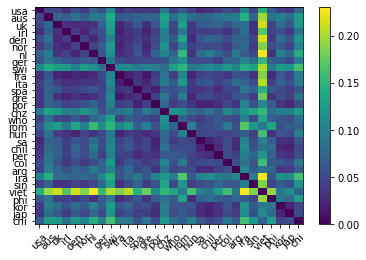

In [17]:
# Plot dissimilarity matrix

ax = plt.imshow(distance,cmap=cm.viridis,aspect='auto')
plt.colorbar(ax)
plt.yticks(ticks=range(len(data)), labels=labs)
plt.xticks(ticks=range(len(data)), labels=labs,rotation=45)
plt.show()

In [18]:
sum(total_words)/len(total_words)

819.6666666666666

In [19]:
total_words

[762,
 350,
 581,
 417,
 765,
 424,
 686,
 701,
 342,
 1797,
 649,
 1453,
 635,
 700,
 508,
 442,
 389,
 783,
 1183,
 1003,
 757,
 238,
 379,
 637,
 595,
 774,
 2210,
 685,
 1128,
 2617]

In [104]:
#Multidmensional scaling to project the dissimilarity matrix in a 2d space

mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1,random_state=33)
pos = mds.fit(distance)

In [ ]:
#Define colors for plotting

asia = '#ff4040'
africa ='#008000'
europe ='#ffa500'
australia = '#008080'
north_america ='#4ca3dd'
south_america ='#a65de2'
who = '#bfbfbf'

c_order =[north_america,australia,europe,europe,europe,
          europe,europe,europe,europe,europe,
          europe,europe,europe,europe,europe,
          who,europe,europe,africa,south_america,south_america,
          south_america,south_america,asia,asia,asia,asia,asia,asia,asia]

In [115]:
# Plot the distances in 2d space with bubble size = length of words in the speech

npos =pos.embedding_
plt.figure(figsize=(40,40),dpi=300)
plt.scatter(npos[:, 0], npos[:, 1], s=np.asarray(total_words)*5, edgecolors='black', c=c_order, alpha=0.5)
for i, word in enumerate(labs):
    plt.annotate(word, xy=(npos[i, 0], npos[i, 1]))
plt.savefig('CovidSpeechBubbles.png')
plt.show()


In [3]:
plt.figure(figsize=(40,40),dpi=300)
plt.scatter([1.1,1.2,1.3,1.4],[1,1,1,1], s=[400*5,1200*5,2000*5,2800*5], edgecolors='black', c='none')
plt.savefig('ref.png',transparent='true')
plt.show()